### Stock Price Prediction using ARIMA and SARIMA
- Autoregressive Integrated Moving Averages

#### Steps -
- Visualize the Time Series Data
- Make the time series data stationary
- Plot the Correlation and AutoCorrelation Charts
- Construct the ARIMA Model or Seasonal ARIMA based on the data
- Use the model to make predictions

In [1]:
# pip install quandl

In [2]:
# pip install pmdarima

In [3]:
# importing required packages
import quandl
import numpy as np
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Configuring API key
quandl.ApiConfig.api_key = ("API-KEY")

### Fetching the data of stock of past 10 years using Quandl RESTful API

# Stock : SBI

In [12]:
# We use the get() function to fetch the historical stock price data for sbi
sbi = quandl.get("BSE/BOM500209", start_date = "2012-11-10", end_date = "2022-11-10")
sbi.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2012-11-12,2355.0,2368.00,2335.10,2360.40,2361.514965,447184.0,2837.0,1.056032e+09,34792.0,7.78,32.90,5.40
2012-11-13,2357.0,2363.35,2331.10,2339.00,2345.598235,13595.0,1258.0,3.188841e+07,6965.0,51.23,32.25,-18.00
2012-11-15,2333.0,2340.00,2278.90,2294.10,2291.209232,79892.0,5221.0,1.830493e+08,44153.0,55.27,61.10,-38.90
2012-11-16,2300.0,2385.85,2291.00,2341.85,2354.184158,111133.0,7777.0,2.616275e+08,39907.0,35.91,94.85,41.85
2012-11-19,2346.0,2379.60,2337.75,2359.90,2357.700330,62402.0,3151.0,1.471252e+08,32175.0,51.56,41.85,13.90


In [13]:
# as we are oly interested in closing price we only keep date and close price columns

In [14]:
df_sbi = sbi[['Close']]
df_sbi.head()

,Close
Date,
2012-11-12,2360.40
2012-11-13,2339.00
2012-11-15,2294.10
2012-11-16,2341.85
2012-11-19,2359.90


In [15]:
df_sbi.tail()

,Close
Date,
2022-11-03,1530.50
2022-11-04,1513.90
2022-11-07,1507.05
2022-11-09,1510.25
2022-11-10,1502.25


In [16]:
print("Shape of data ", df_sbi.shape)

Shape of data  (2473, 1)


In [17]:
# check for missing values
df_sbi.isnull().sum()

Close    0
dtype: int64

In [20]:
## the data looks seasonal
# df_sbi.plot()

#### Since we are only interested in predicting the closing price, that is the only column we will be plotting.

Text(0.5, 1.0, 'SBI Closing Price')

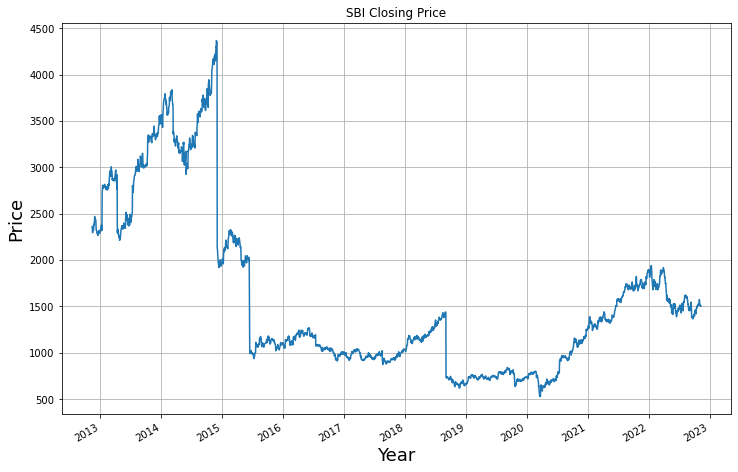

In [21]:
## Plotting the close price of SBI
fig = df_sbi['Close'].plot(grid=True, figsize=(12,8))
fig.set_xlabel("Year", size=18)
fig.set_ylabel("Price", size=18)
fig.set_title("SBI Closing Price")

Any time series data that has to be modeled needs to be stationary. Stationary means that it’s statistical properties are more or less constant with time.

The series becomes stationary if both the mean and standard deviation are flat lines (constant mean and constant variance).

- Constant Mean
- Constant Variance(There can be variations, but the variations shouldn’t be irregular)
- No seasonality(No repeating patterns in the data set)

We have a test to check for stationarity called the ADF(Augmented Dickey Fuller Test).


 ##### ADF(Augmented Dickey Fuller Test)

In [22]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df_sbi['Close'])

1. ADF :  -1.78159161800336
2. P-Value :  0.38963847949651315
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 2472
5. Critical Values :
	 1% :  -3.4329981001019
	 5% :  -2.8627099107344347
	 10% :  -2.567392789776238


##### If p< 0.05 ; Data is stationary

##### if p>0.05; Data is not stationary

- So, our data is not stationary, because of an downword trend resulting in a varying mean. We simply subtract it from previous values. It becomes stationary.

#### DIFFERENCING:
- Differencing is used to data transform for making time series data stationary.
- Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

In [23]:
# Here the value 20 is the number of index values per period of time you are calculating.
df_sbi['Close First Difference']=df_sbi['Close']-df_sbi['Close'].shift(1)
df_sbi['Seasonal First Difference']=df_sbi['Close']-df_sbi['Close'].shift(20)

C:\Users\jayda\AppData\Local\Temp\ipykernel_14520\1760682345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sbi['Close First Difference']=df_sbi['Close']-df_sbi['Close'].shift(1)
C:\Users\jayda\AppData\Local\Temp\ipykernel_14520\1760682345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sbi['Seasonal First Difference']=df_sbi['Close']-df_sbi['Close'].shift(20)


In [24]:
df_sbi.head(18)

,Close,Close First Difference,Seasonal First Difference
Date,,,
2012-11-12,2360.40,NaN,NaN
2012-11-13,2339.00,-21.40,NaN
2012-11-15,2294.10,-44.90,NaN
2012-11-16,2341.85,47.75,NaN
2012-11-19,2359.90,18.05,NaN
2012-11-20,2325.40,-34.50,NaN
2012-11-21,2348.35,22.95,NaN
2012-11-22,2384.75,36.40,NaN
2012-11-23,2376.00,-8.75,NaN


In [25]:
df_sbi.isnull().sum()

Close                         0
Close First Difference        1
Seasonal First Difference    20
dtype: int64

In [26]:
## Again test dickey fuller test
ad_test(df_sbi['Seasonal First Difference'].dropna())

1. ADF :  -7.684772426000334
2. P-Value :  1.471547085573744e-11
3. Num Of Lags :  27
4. Num Of Observations Used For ADF Regression: 2425
5. Critical Values :
	 1% :  -3.433049478585333
	 5% :  -2.8627325990879102
	 10% :  -2.567404869422893


<AxesSubplot:xlabel='Date'>

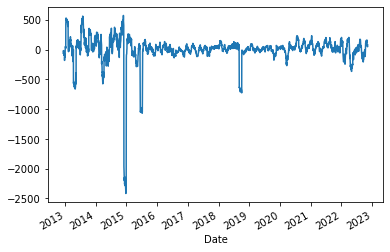

In [27]:
df_sbi['Seasonal First Difference'].plot()

### Plot the Correlation and AutoCorrelation Charts

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\jayda\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


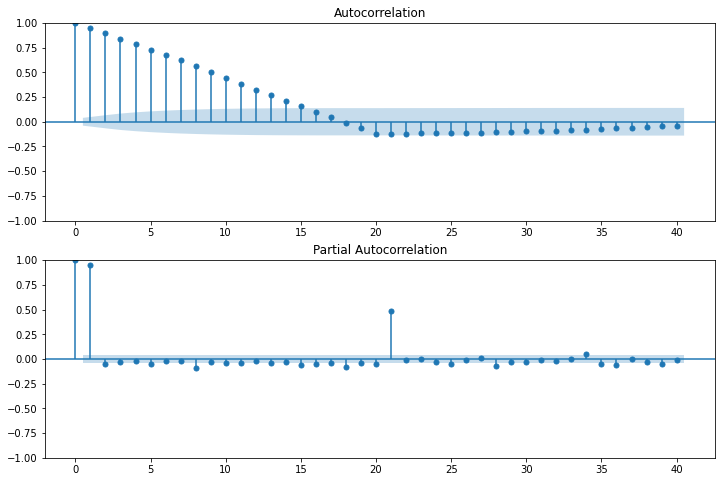

In [29]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_sbi['Seasonal First Difference'].iloc[21:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_sbi['Seasonal First Difference'].iloc[21:], lags=40, ax=ax2)

- NOW OUR DATA IS STATIONARY.

### ARIMA is composed of 3 terms(Auto-Regression + Integrated+Moving-Average)  

- decide the order of the AR, I, MA parts which are denoted by(p,d,q) respectively.

- p -> AR model lags
- d -> differencing
- q -> MA lags

In [30]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(sbi['Close'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27244.780, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27246.585, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27246.580, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27242.864, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27248.481, Time=1.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.571 seconds


- We can see the best ARIMA model seems to be of the order (0,1,0) with the minimum AIC score=27242.864
- With this knowledge we can finally proceed to train and fit the model to start making prediction!

In [31]:
# p=0
# d=1
# q=0

In [32]:
# ARIMA  Should be used only when your data is not seasonal 
# but in this case data is seasonal but we'll see how to implement it

## Splitting dataset into Train & Test

In [33]:
print(df_sbi.shape)
train_data = df_sbi.iloc[:int(len(df_sbi)*0.8)]
test_data =df_sbi.iloc[int(len(df_sbi)*0.8):]
print(train_data.shape,test_data.shape)

(2473, 3)
(1978, 3) (495, 3)


In [34]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_data['Close'],order=(0,1,0))
model=model.fit()
model.summary()


C:\Users\jayda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jayda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jayda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1978
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11081.366
Date:                Sun, 13 Nov 2022   AIC                          22164.731
Time:                        17:07:52   BIC                          22170.321
Sample:                             0   HQIC                         22166.785
                               - 1978                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4323.8483      7.367    586.916      0.000    4309.409    4338.288
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):          39781128.05
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.08   Skew:                           -22.13
Prob(H) (two-sided):                  0.00   Kurtosis:                       696.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
output = model.forecast(steps=len(test_data))
output

C:\Users\jayda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


1978    1090.95
1979    1090.95
1980    1090.95
1981    1090.95
1982    1090.95
         ...   
2468    1090.95
2469    1090.95
2470    1090.95
2471    1090.95
2472    1090.95
Name: predicted_mean, Length: 495, dtype: float64

### Evaluating Model

In [36]:
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=df_sbi.index[start:end+1]
print(pred)

Date
2020-11-11    1090.95
2020-11-12    1090.95
2020-11-13    1090.95
2020-11-14    1090.95
2020-11-17    1090.95
               ...   
2022-11-03    1090.95
2022-11-04    1090.95
2022-11-07    1090.95
2022-11-09    1090.95
2022-11-10    1090.95
Name: ARIMA Predictions, Length: 495, dtype: float64


C:\Users\jayda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_data['Close'].mean()
rmse=sqrt(mean_squared_error(pred,test_data['Close']))
print(rmse)

486.95699527522436


## SARIMA Model

In [38]:
import statsmodels.api as sm

In [39]:
model=sm.tsa.statespace.SARIMAX(df_sbi['Close'],order=(0,1,0),seasonal_order=(0,1,0,20))
results=model.fit()

C:\Users\jayda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\jayda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [40]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 2473
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 20)   Log Likelihood              -14401.729
Date:                            Sun, 13 Nov 2022   AIC                          28805.459
Time:                                    17:08:49   BIC                          28811.263
Sample:                                         0   HQIC                         28807.568
                                           - 2473                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7398.6127     14.523    509.454      0.000    7370.149    7427.077
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):          18143157.53
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                       424.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\jayda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jayda\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
C:\Users\jayda\AppData\Local\Temp\ipykernel_14520\2367861879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sbi['forecast']=results.predict(start=6000,end=6620,dynamic=True)


<AxesSubplot:xlabel='Date'>

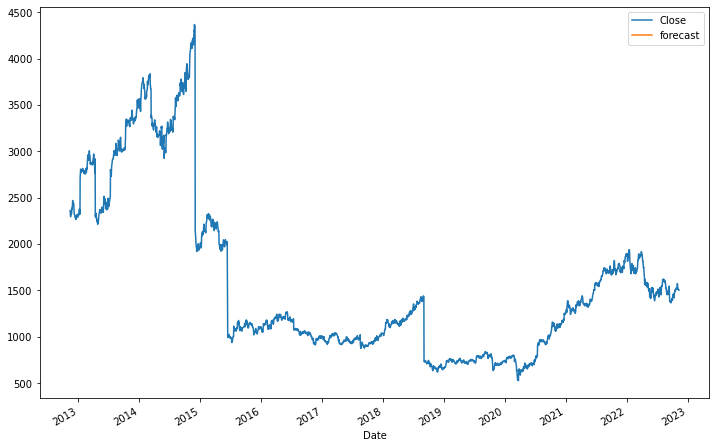

In [53]:
df_sbi['forecast']=results.predict(start=6000,end=6620,dynamic=True)
df_sbi[['Close','forecast']].plot(figsize=(12,8))